# Applied Machine Learning
## Applications

The first portion of this session will review topics from day 2:
* Data understanding
* Data preparation
* Modeling (select supervised methods)
* Evaluation

### Data: Titanic dataset
Contains 12 variables of various types. 
* PassengerId: row ID
* Survived: binary; indicates whether or not the passenger survived.
* Pclass: Ticket class; values:
    * 1 = 1st
    * 2 = 2nd
    * 3 = 3rd
* Name: name of the passenger
* Sex: male / female
* Age: age in years (numerical)
* SibSp: number of siblings and spouses aboard
* Parch: number of parents and children aboard
* Ticket: ticket number (string)
* Fare: passenger fare
* Cabin: cabin number (string)
* Embarked: port of embarkation
    * S = Southampton
    * Q = Queenstown
    * C = Cherbourg

This is a common dataset for visualization and machine learning because it is easy to understand and supports a broad range of activities. 

Ultimately, our goal is to predict passenger survival (classification). 

Available on Kaggle, among many other places online (https://www.kaggle.com/c/titanic/data).

***

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score,\
f1_score, precision_recall_curve, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

In [2]:
path = '../../../Datasets/titanic.csv'
df = pd.read_csv(path)
print("Shape:", df.shape)
df.head()

Shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
298,299,1,1,"Saalfeld, Mr. Adolphe",male,NaN,0,0,19988,30.5000,C106,S
372,373,0,3,"Beavan, Mr. William Thomas",male,19.0,0,0,323951,8.0500,NaN,S
196,197,0,3,"Mernagh, Mr. Robert",male,NaN,0,0,368703,7.7500,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
89,90,0,3,"Celotti, Mr. Francesco",male,24.0,0,0,343275,8.0500,NaN,S
64,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C
292,293,0,2,"Levy, Mr. Rene Jacques",male,36.0,0,0,SC/Paris 2163,12.8750,D,C
712,713,1,1,"Taylor, Mr. Elmer Zebley",male,48.0,1,0,19996,52.0000,C126,S
132,133,0,3,"Robins, Mrs. Alexander A (Grace Charity Laury)",female,47.0,1,0,A/5. 3337,14.5000,NaN,S
576,577,1,2,"Garside, Miss. Ethel",female,34.0,0,0,243880,13.0000,NaN,S


### Data understanding
#### Feature overview

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


A few notes here:
* Missing values in the `Age`, `Cabin`, and `Embarked` features. 
* Several features that appear to be categorical are currently stored as generic objects: `Sex`, `Embarked`, and maybe `Cabin` and `Ticket`. 
* PassingerId appears to be the row identifier, and is not important for our analysis. Because we are familiar with the data or domain, we know we can go ahead and drop that feature.

In [7]:
df.drop('PassengerId', axis=1, inplace=True)

Change the categorical data types to categorical.

In [6]:
df[['Sex','Ticket','Cabin','Embarked']] = df[['Sex','Ticket','Cabin','Embarked']].astype('category')

See desciptive statistics for numerical features with the `describe()` function.

In [8]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


View value counts for categorical data.
* See a count of each level
* Look for any irregularies

Another quick way to get a feel for the data is through data visualization. Histograms or bar plots are an excellent way to see the overall shape of the data. We can plot the value counts data through the pandas `barh` function.

male      577
female    314
Name: Sex, dtype: int64


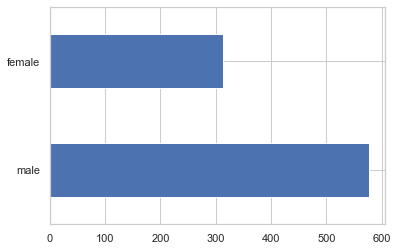

In [9]:
print(df['Sex'].value_counts())
df['Sex'].value_counts().plot(kind='barh')
plt.show()

S    644
C    168
Q     77
Name: Embarked, dtype: int64


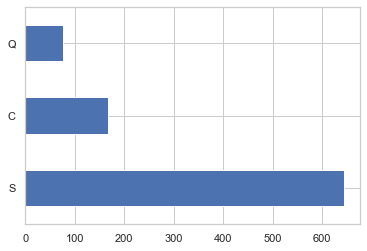

In [10]:
print(df['Embarked'].value_counts())
df['Embarked'].value_counts().plot(kind='barh')
plt.show()

In [11]:
df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
F2             3
C22 C26        3
              ..
D19            1
D21            1
D28            1
D30            1
A10            1
Name: Cabin, Length: 147, dtype: int64

* 147 distinct cabin values (out of 204 observations containing a value for `cabin`). So multiple people per cabin.
* Do the letters in the cabin value mean anything? 

In [12]:
df['Ticket'].value_counts()

CA. 2343    7
1601        7
347082      7
347088      6
CA 2144     6
           ..
PC 17601    1
349239      1
349240      1
349241      1
347464      1
Name: Ticket, Length: 681, dtype: int64

In many cases, a several individuals share a single ticket. This may or may not be notable. 

For the numerical attributes, let's take a look at the associated histogram.

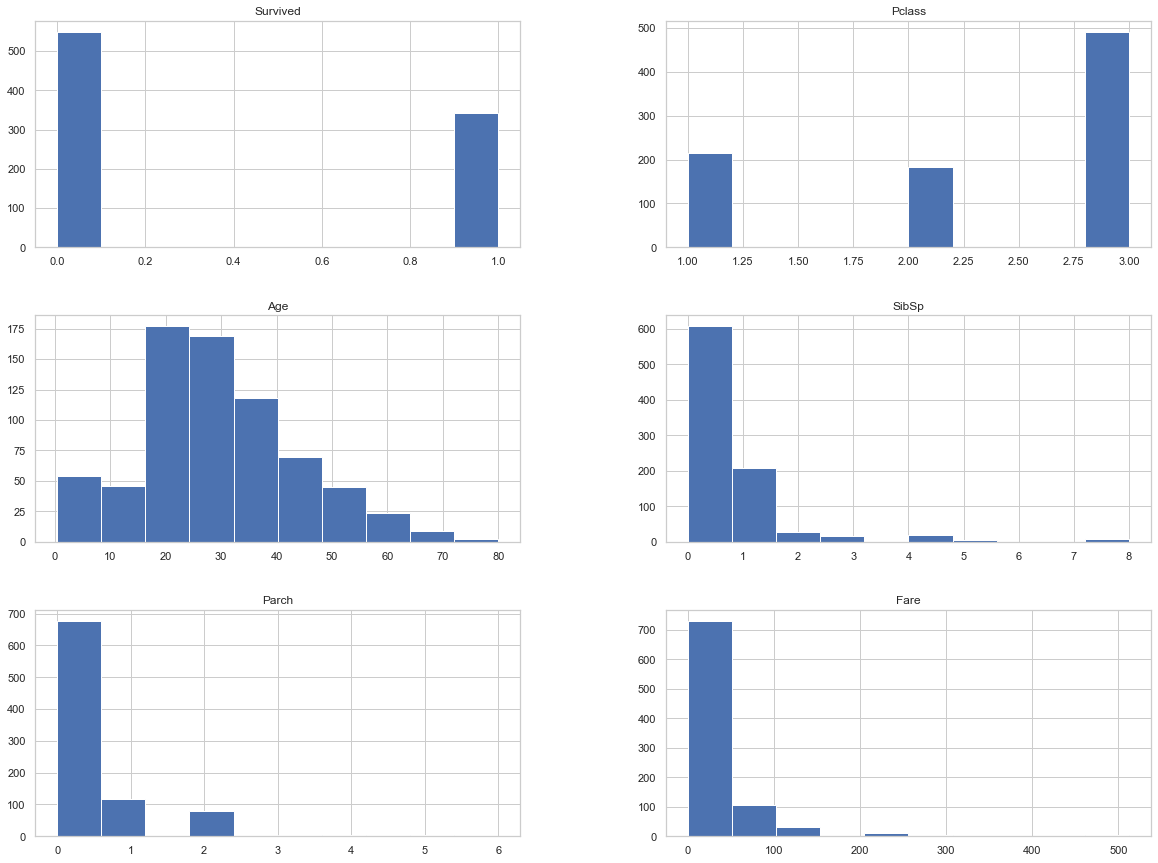

In [13]:
df.hist(figsize=(20,15))
plt.show()

#### Outliers
* Defined as `Q1/Q3 +/- 1.5 * IQR`

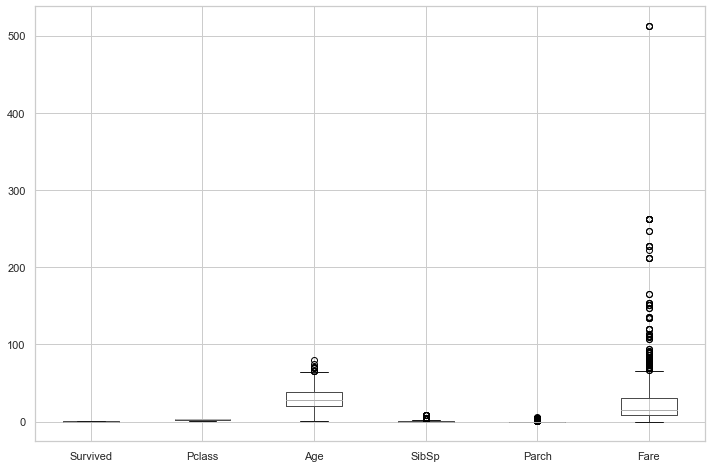

In [14]:
df.boxplot(figsize=(12,8))
plt.show()

Because the data are not on the same scale, it is difficult to see those with smaller ranges. We can look at the boxplots individually to see in more detail.

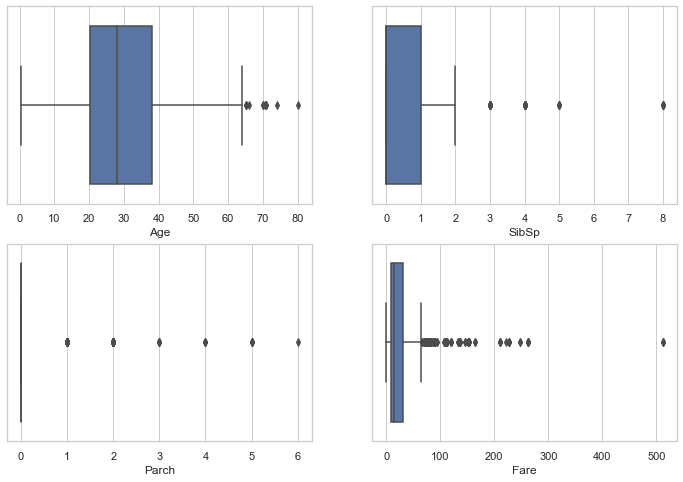

In [15]:
fig = plt.figure(figsize=(12,8))
plt.subplot(2, 2, 1)
sns.boxplot(x=df['Age'])
plt.subplot(2, 2, 2)
sns.boxplot(x=df['SibSp'])
plt.subplot(2, 2, 3)
sns.boxplot(x=df['Parch'])
plt.subplot(2, 2, 4)
sns.boxplot(x=df['Fare'])
plt.show()

Notes: 
* The following features have outliers: Age, SibSp, Parch, and Fare
* Fare has the most outliers (and the most extreme)
* We will need to decide how to treat the outliers prior to modeling

#### Skewed distributions
* Looking at the histograms above, I notice severy right-skewed distributions:
    - Age
    - SibSp
    - Parch
    - Fare
    
Values greater than 1 are highly skewed.

In [16]:
print(df['Age'].skew())
print(df['SibSp'].skew())
print(df['Parch'].skew())
print(df['Fare'].skew())

0.38910778230082704
3.6953517271630565
2.7491170471010933
4.787316519674893


`SibSp`, `Parch`, and `Fare` are highly skewed.

#### Correlations

In [17]:
corr_matrix = df.corr()
corr_matrix['Survived'].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Pclass     -0.338481
Name: Survived, dtype: float64

Correlations > 0.5 are considered highly correlated. From 0.3 - 0.49 is considered moderate correlation.

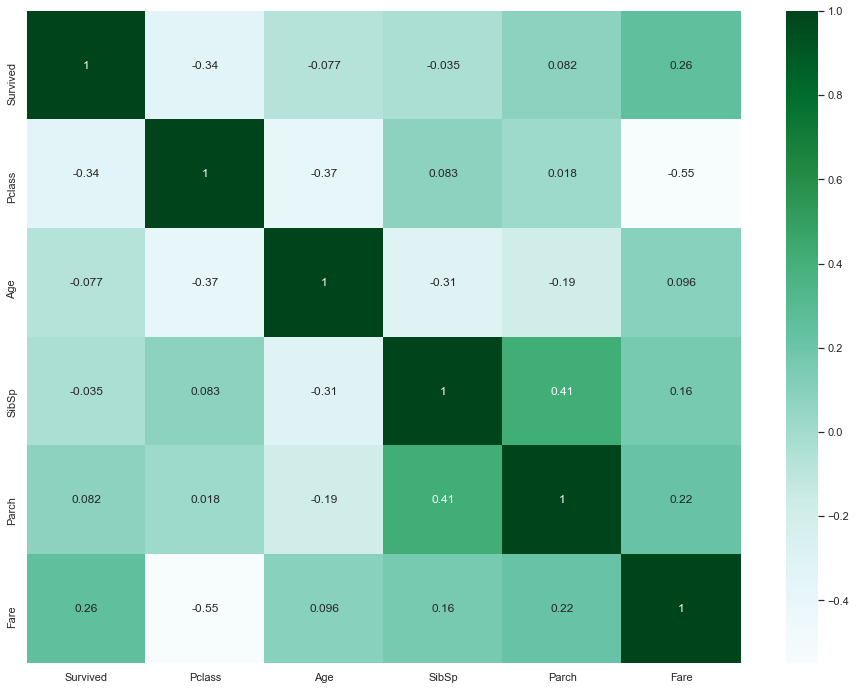

In [18]:
plt.figure(figsize=(16,12))
sns.heatmap(data=corr_matrix, annot=True, cmap='BuGn')
plt.show()

Note: 
* High correlation between `Fare` and `Pclass`
* Moderate correlations between `Parch`/`SibSp`, `Pclass`/`Survived`, and `Pclass`/`Age`

#### Other patterns/relationships

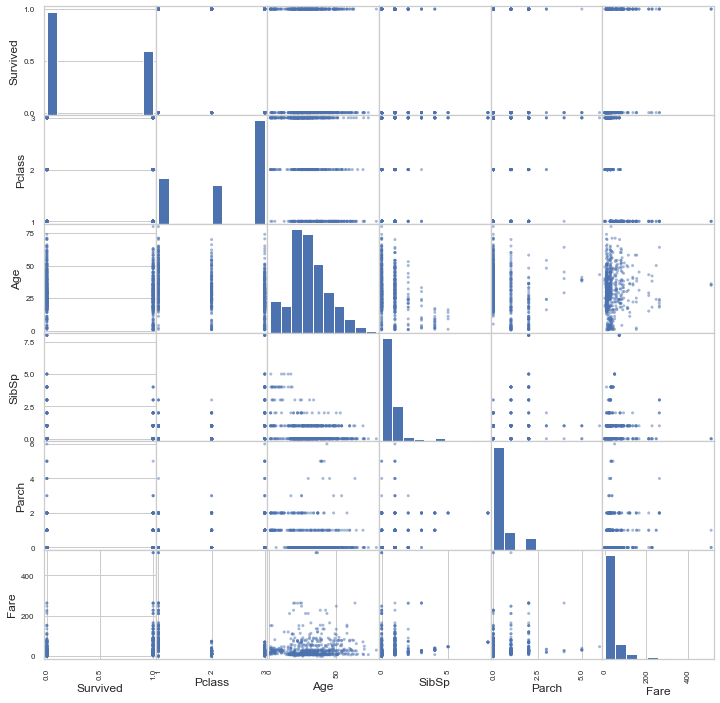

In [19]:
pd.plotting.scatter_matrix(df, figsize=(12, 12))
plt.show()

### Data prep
* We've identified several areas that might be addressed
    - Missing data in the `Age`, `Cabin`, and `Embarked` features
    - Outliers: `Age`, `SibSp`, `Parch`, and `Fare`

#### Missing data

In [20]:
df.isnull().sum(axis=0)

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

It is odd that there are only two missing values in `Embarked`. Let's take a loser look.

In [21]:
df[df['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Notice that the Ticket and Cabin values for the two passengers match. Further investigation (online search) shows that these two embarked from Southampton. We can resolve these missing values.

In [22]:
df['Embarked'] = df['Embarked'].fillna('S')

`Age` is missing just less than 20% of possible values. We will use SKLearn's SimpleImputer function (after train-test split) to impute median values. Feel free to use a more advanced method.

Roughly 77% of values in the `Cabin` feature are missing. We'll simply drop that feature for the purposes of this demonstration.

In [23]:
df.drop('Cabin', axis=1, inplace=True)

#### New feature

We have identified outliers in `SibSp` and `Parch`. However, it strikes me that these are related features:
* Moderately correlated
* Similar type of data

Let's combine those two features to create a new feature called `FamilySize`.

In [24]:
df['FamilySize'] = df['Parch'] + df['SibSp'] + 1
df.drop(['SibSp','Parch'], axis=1, inplace=True)

#### Create test set
Before we go any further, it is important to set aside a portion of the data as a _test set_.

In [25]:
data = df.drop(['Name','Ticket'], axis=1).copy()
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1


In [26]:
train, test = train_test_split(df, test_size=0.2, random_state=48)

#### Outliers
Let's use the clamp method that Dr. Nicholson discussed to deal with outliers. We've identified outliers in the `Age`, `FamilySize`, and `Fare` features.

In [27]:
def getMax(data, var):
    """
    Provides a clamp value at 1.5*IQR + Q3
    Input:
        data = DataFrame
        var = str: feature to clamp
    Out: clamp value
    """ 
    q3 = data[var].quantile(q=0.75)
    q1 = data[var].quantile(q=0.25)
    iqr = q3 - q1
    cval = q3 + iqr * 1.5
    return cval

In [28]:
ageMax = getMax(train, 'Age')
FamilySizeMax = getMax(train, 'FamilySize')
FareMax = getMax(train, 'Fare')

In [29]:
def clamp(data, test, var, val):
    d = data.copy()
    t = test.copy()
    d[var] = np.where(data[var]>val, val, data[var])
    t[var] = np.where(test[var]>val, val, test[var])
    return d, t

In [30]:
train, test = clamp(train, test, 'Age', ageMax)
train, test = clamp(train, test, 'FamilySize', FamilySizeMax)
train, test = clamp(train, test, 'Fare', FareMax)

#### Transformation
* Imputation
* Scale
* One Hot Encoding

In [31]:
X_train = train.drop('Survived', axis=1)
y_train = train['Survived'].copy()
X_test = test.drop('Survived', axis=1)
y_test = test['Survived'].copy()

Next we'll use a feature in SK-Learn called a **Pipeline**. 
* Pipeline helps with sequences of data transformations.
* This is useful because there may be many different transformations on the data that must be executed in the same order each time. 
* Also remembers certains values from the training data, like imputation values, that will be used for the test data.

**Imputation**: Several techniques facilitate working with/around missing data, including dropping observations or features, mean or median, and more advanced techniques. For this example, we'll use median imputation to fill missing data. 

**Scale**: standard Z-score scale (mean = 0 and unit variance)

In [32]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), 
    ('std_scaler', StandardScaler()),
])

The categorical pipeline uses the One Hot Encoding.

In [33]:
num_attrs = ['Pclass','Age','Fare','FamilySize']
cat_attrs = ['Sex','Embarked']

pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attrs),
    ('cat', OneHotEncoder(drop='first'), cat_attrs)
])

X_train = pipeline.fit_transform(X_train)

### Modeling

#### Logistic regression

In [34]:
log_reg = LogisticRegression()

Here we're going to use cross validation, which helps us better understand the model's generalizability. It helps to to test the model's ability to predict new, unseen data to flag problems like overfitting.

[Scoring](https://scikit-learn.org/stable/modules/model_evaluation.html)

In [35]:
scores_log_reg = cross_val_score(log_reg, X_train, y_train, scoring='accuracy', cv=10)
print(scores_log_reg)

[0.80555556 0.77777778 0.85915493 0.81690141 0.77464789 0.84507042
 0.8028169  0.76056338 0.83098592 0.67605634]


Accuracy looks okay, but recall that this is a flawed metric. Instead, let's look at the confusion matrix.

In [36]:
pred_log_reg = cross_val_predict(log_reg, X_train, y_train, cv=10)
confusion_matrix(y_train, pred_log_reg)

array([[375,  66],
       [ 80, 191]])

In [37]:
pd.DataFrame({'Actual':y_train, 'Predicted':pred_log_reg})

,Actual,Predicted
182,0,0
105,0,0
846,0,0
112,0,0
432,1,1
...,...,...
347,1,1
452,0,1
337,1,1
563,0,0


Print precision, recall and F1 scores.
* **precision** is the true positive / all predicted positive. Of predicted positive outcomes, how many are actually positive. Useful when the costs of false positives are high. (Classic example: spam detection).
* **recall** is true positive / true pos. + false neg. Of the actual positive values, how many did we correctly predict? More useful when there is a high cost associated with a false negative. (Classic example: healthcare, when a sick patiet is deemed healthy).
* **F1**: Is a function of precision and recall which tries to encapsulate both in a single number. Especially useful (as opposed to accuracy) when there is a class imbalance.

In [38]:
print("Precision: ", precision_score(y_train, pred_log_reg))
print("Recall:    ", recall_score(y_train, pred_log_reg))
print("F1:        ", f1_score(y_train, pred_log_reg))

Precision:  0.7431906614785992
Recall:     0.7047970479704797
F1:         0.7234848484848485


Plot precision and recall.

`cross_val_predict` generates cross validated estimates for each input data point. The method (`decision_function`) specifies to return the decision scores instead of predictions.

In [39]:
prc_log_reg = cross_val_predict(log_reg, X_train, y_train, cv=10, method='decision_function')
precisions, recalls, thresholds = precision_recall_curve(y_train, prc_log_reg)

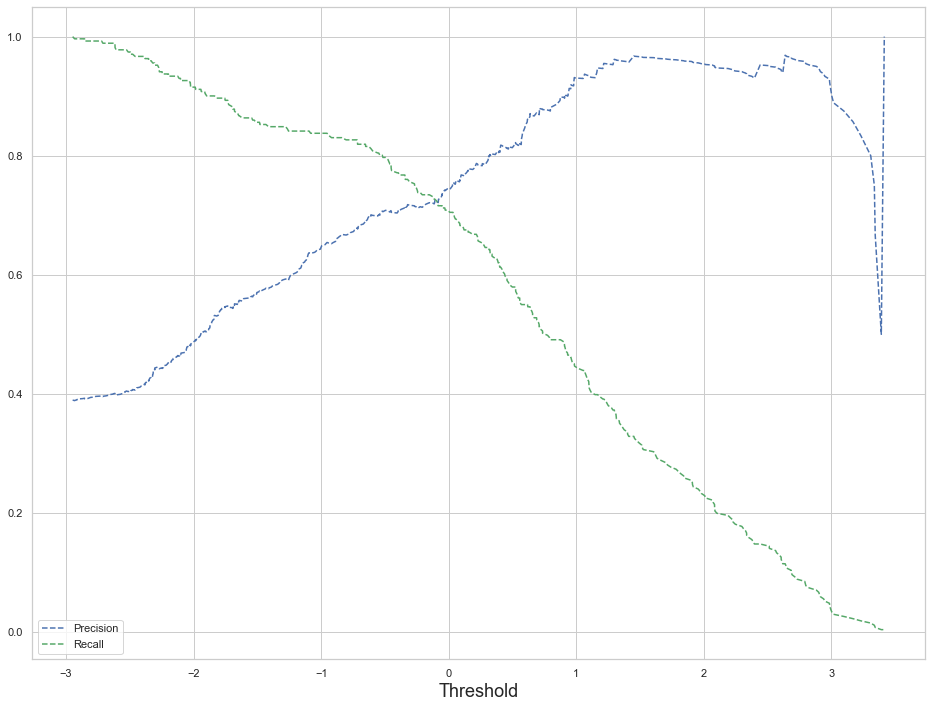

In [40]:
plt.figure(figsize=(16,12))
plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
plt.plot(thresholds, recalls[:-1], 'g--', label='Recall')
plt.xlabel('Threshold', fontsize=18)
plt.legend()
plt.show()

The plot above demonstrates the tradeoff between precision and recall. As you adjust the decision threshold to increase precision, recall is reduced. Your choice for the threshold value will depend on your application and priorities.

Next we'll plot the ROC curve and get the AUC. 

The ROC curve plots the _true positive rate_ (recall) against the _false positive rate_ (FPR). It gives an indication of how well the model distinguishes between classes.

In [41]:
fpr, tpr, thresholds = roc_curve(y_train, prc_log_reg)

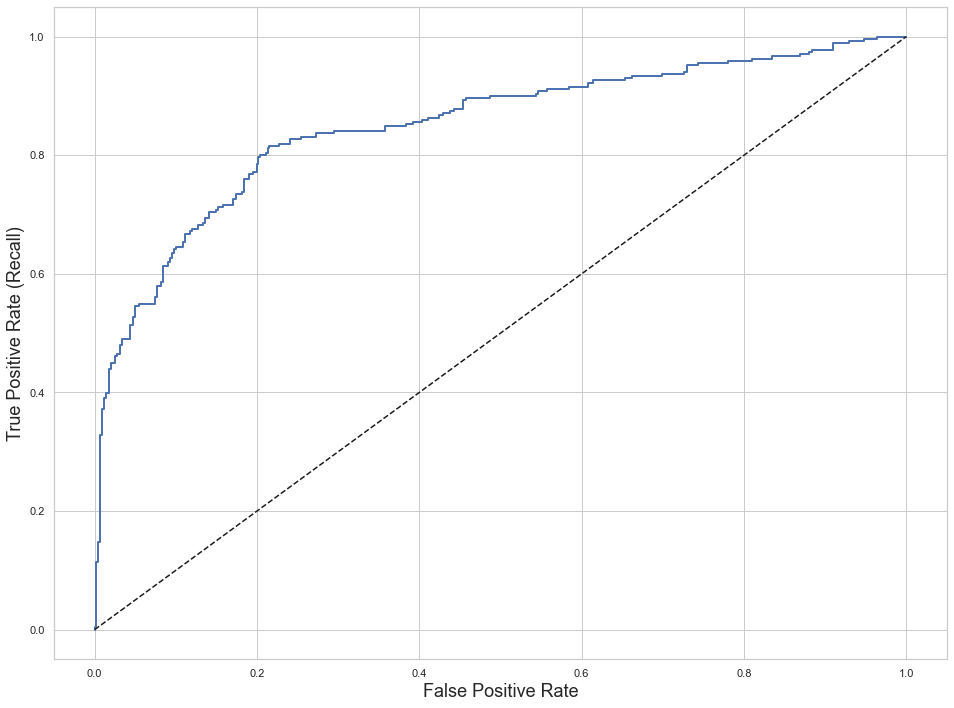

In [42]:
plt.figure(figsize=(16,12))
plt.plot(fpr, tpr, linewidth=2, label=None)
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate (Recall)', fontsize=18)
plt.show()

In [43]:
roc_auc_score(y_train, prc_log_reg)

0.8495368627155659

#### Random Forest
* Random forest is an ensemble method that aggregates the predictions of a group of decision trees.

In [44]:
rf = RandomForestClassifier(random_state=48)
y_probas_forest = cross_val_predict(rf, X_train, y_train, cv=10, method='predict_proba')

In [45]:
y_scores_rf = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train, y_scores_rf)
# Gives the False Positive Rate, True Positive Rate, and Thresholds which we'll use to plot the ROC curve.

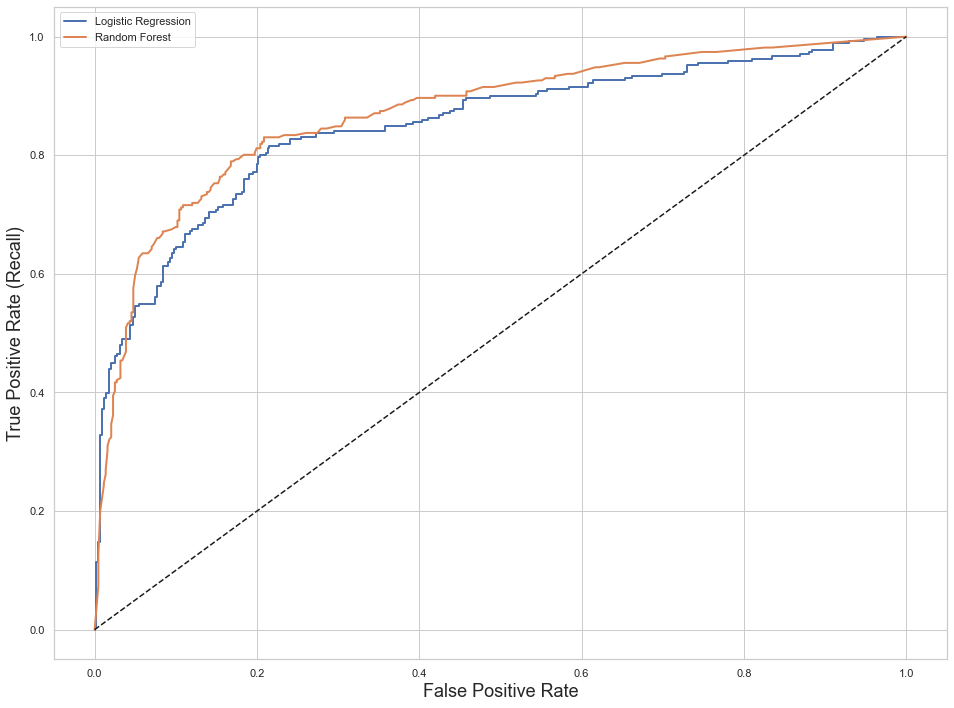

In [46]:
plt.figure(figsize=(16,12))
plt.plot(fpr, tpr, linewidth=2, label='Logistic Regression')
plt.plot(fpr_forest, tpr_forest, linewidth=2, label='Random Forest')
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate (Recall)', fontsize=18)
plt.legend()
plt.show()

In [47]:
roc_auc_score(y_train, y_scores_rf)

0.8708319736258587

#### SVM

In [48]:
clf_svm = SVC()
clf_svm.fit(X_train, y_train) 

SVC()

In [49]:
pred_SVM = cross_val_score(clf_svm, X_train, y_train, cv=10, scoring='roc_auc')
print(pred_SVM.mean())

0.8642952006840895


#### Tuning RF

Our goal now is to optimize the hyperparameters for our random forest. Let's take a look at the available parameters.

In [50]:
print('Parameters:\n')
print(rf.get_params())

Parameters:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 48, 'verbose': 0, 'warm_start': False}


We will search for the following hyperparameters: n_estimators, max_features.

If you went through the example notebooks, you may have noticed an implementation of `GridSearchCV`, which is an exhaustive search through a given set of parameter values.

The example below uses an alternative called `RandomizedSearchCV`, in which a fixed number of parameter settings is sampled. In the interest of time we'll sample 50 combinations.

In [51]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=100)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features}

print(random_grid)

{'n_estimators': [200, 218, 236, 254, 272, 290, 309, 327, 345, 363, 381, 400, 418, 436, 454, 472, 490, 509, 527, 545, 563, 581, 600, 618, 636, 654, 672, 690, 709, 727, 745, 763, 781, 800, 818, 836, 854, 872, 890, 909, 927, 945, 963, 981, 1000, 1018, 1036, 1054, 1072, 1090, 1109, 1127, 1145, 1163, 1181, 1200, 1218, 1236, 1254, 1272, 1290, 1309, 1327, 1345, 1363, 1381, 1400, 1418, 1436, 1454, 1472, 1490, 1509, 1527, 1545, 1563, 1581, 1600, 1618, 1636, 1654, 1672, 1690, 1709, 1727, 1745, 1763, 1781, 1800, 1818, 1836, 1854, 1872, 1890, 1909, 1927, 1945, 1963, 1981, 2000], 'max_features': ['auto', 'sqrt']}


In [53]:
rf = RandomForestClassifier(random_state=48)
# Random search of parameters, using 5 fold cross validation, 
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, 
                               n_iter=50, cv=5, verbose=5, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   54.4s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=48),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [200, 218, 236, 254,
                                                         272, 290, 309, 327,
                                                         345, 363, 381, 400,
                                                         418, 436, 454, 472,
                                                         490, 509, 527, 545,
                                                         563, 581, 600, 618,
                                                         636, 654, 672, 690,
                                                         709, 727, ...]},
                   verbose=5)

We can get the best performing parameters with the `best_params_` attribute.

In [54]:
rf_random.best_params_

{'n_estimators': 254, 'max_features': 'sqrt'}

#### Model Evaluation

Use the transformation pipeline on the test data.

In [55]:
X_test_tr = pipeline.transform(X_test)

In [56]:
rf_tuned = RandomForestClassifier(n_estimators=254, max_features='sqrt', random_state=48)
rf_tuned.fit(X_train, y_train)
pred_rf = rf_tuned.predict(X_test_tr)

In [57]:
confusion_matrix(y_test, pred_rf)

array([[85, 23],
       [20, 51]])

In [58]:
print("Precision: ", precision_score(y_test, pred_rf))
print("Recall:    ", recall_score(y_test, pred_rf))
print("F1:        ", f1_score(y_test, pred_rf))

Precision:  0.6891891891891891
Recall:     0.7183098591549296
F1:         0.7034482758620689


In [59]:
fpr, tpr, thresholds = roc_curve(y_test, pred_rf)

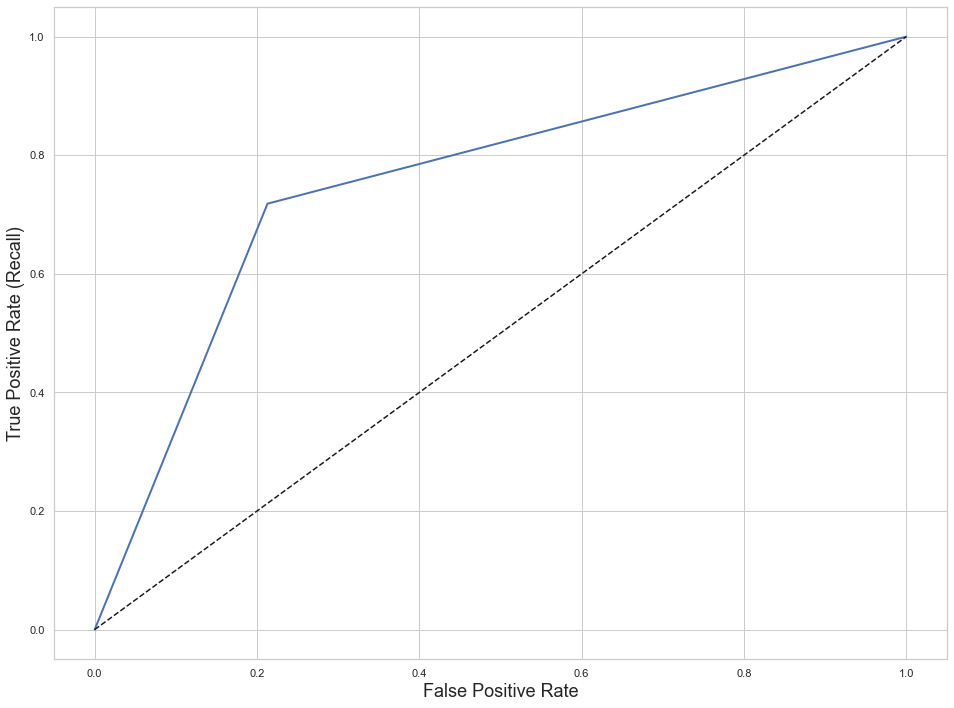

In [60]:
plt.figure(figsize=(16,12))
plt.plot(fpr, tpr, linewidth=2, label=None)
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate (Recall)', fontsize=18)
plt.show()

In [61]:
roc_auc_score(y_test, pred_rf)

0.7526734480959832